<a href="https://colab.research.google.com/github/brendanpshea/programming_problem_solving/blob/main/Java_09_Exceptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exception-al Programming at the Bank of Evil
**Brendan Shea, PhD**

Congratulations! You've been recruited to work in the IT department of the most notorious financial institution in the world - the Bank of Evil. As Gru's newest software developers, you'll be responsible for building rock-solid banking applications that can handle the unique challenges of villain banking.

In this chapter, we'll explore two critical aspects of Java programming that every evil genius programmer must master.

1. First, we'll dive deep into how Java programs are **compiled** and **executed**, understanding the journey your code takes from source files to running applications.
2. Second, we'll learn about **exceptions** - Java's way of handling unexpected situations and errors that can occur during program execution.
By the end of this chapter, you'll have the skills to build banking software worthy of the most sophisticated criminal masterminds - software that's both powerful and reliable enough to fund any dastardly plot!

## Brendan's Lecture


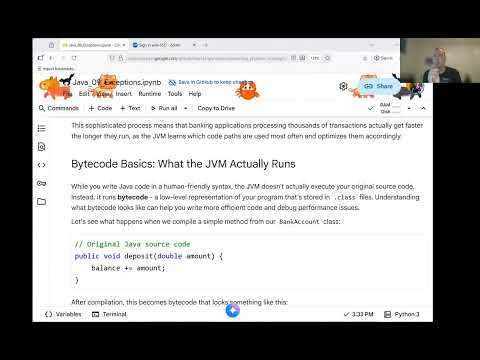

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('WGUgijZBaZs', width=800, height=500)

# Our Mission: Building Bulletproof Banking Software

The Bank of Evil handles billions of dollars in villain assets, from Dr. Nefario's invention funds to Vector's pyramid scheme profits. When dealing with such vast sums of money belonging to the world's most dangerous criminals, there's absolutely no room for software bugs or system crashes.

Understanding how Java compiles and runs your code is essential for several reasons. When you know what happens behind the scenes, you can write more efficient programs, debug problems faster, and avoid common pitfalls that could bring down the entire banking system. Imagine the chaos if Scarlet Overkill couldn't access her funds right before a major heist!

Similarly, **exception handling** is your safety net when things go wrong. In the banking world, errors are inevitable - customers might try to withdraw more money than they have, network connections might fail during transfers, or suspicious activity might trigger security protocols. Professional-grade software must handle these situations gracefully rather than crashing spectacularly.

Throughout this chapter, we'll build a complete banking system that demonstrates these concepts in action. You'll see how proper exception handling can mean the difference between a minor inconvenience and a catastrophic system failure that could topple an entire criminal empire.

# Setting Up Our Evil Empire's Codebase

Before we dive into the technical details, let's establish the foundation of our banking system using the inheritance concepts you've already mastered. Our Bank of Evil serves different types of customers, each with their own unique needs and account features.

Here's our basic class hierarchy that we'll build upon throughout this chapter:


In [ ]:
%%bash
# RUN THIS FIRST - install java 25
apt-get update > /dev/null 2>&1
apt-get install openjdk-25-jdk -y > /dev/null 2>&1

if [ $? -eq 0 ]; then
    echo "Java 25 installation completed."
else
    echo "Java 25 installation failed. Check logs above for errors."
fi

In [30]:
%%writefile BankAccount.java
// Base class for all bank accounts
public class BankAccount {
    protected String accountNumber;
    protected double balance;
    protected String ownerName;

    public BankAccount(String accountNumber, String ownerName) {
        this.accountNumber = accountNumber;
        this.ownerName = ownerName;
        this.balance = 0.0;
    }

    public void deposit(double amount) {
        balance += amount;
    }

    public void withdraw(double amount) {
        balance -= amount;
    }

    public double getBalance() {
        return balance;
    }

    public String getAccountNumber(){
      return accountNumber;
    }

    public String getOwnerName(){
      return ownerName;
    }
}

Overwriting BankAccount.java


In [31]:
%%writefile VillainAccount.java
// Specialized account for master villains
public class VillainAccount extends BankAccount {
    private String evilPlan;
    private double creditLimit;

    public VillainAccount(String accountNumber, String villainName, String evilPlan) {
        super(accountNumber, villainName);
        this.evilPlan = evilPlan;
        this.creditLimit = 1000000.0; // Villains get high credit limits
    }
}


Overwriting VillainAccount.java


In [32]:
%%writefile MinionAccount.java
// Account type for minion employees
public class MinionAccount extends BankAccount {
    private String supervisor;

    public MinionAccount(String accountNumber, String minionName, String supervisor) {
        super(accountNumber, minionName);
        this.supervisor = supervisor;
    }
}


Overwriting MinionAccount.java



This inheritance structure gives us a solid foundation to explore compilation and exception handling. Notice how we're using concepts like inheritance, method overriding, and access modifiers that you've already learned. As we progress through the chapter, we'll see how Java compiles these classes and how we can make them more robust with proper exception handling.

# From Source to Bytecode: The Java Compilation Journey

When you write Java code for the Bank of Evil's systems, your human-readable source code doesn't run directly on the computer. Instead, it goes through a fascinating multi-step process that makes Java programs both powerful and portable across different operating systems.

Here's exactly what happens when you build and run a Java banking application:

1. **Write Source Code**: You create `.java` files containing classes like `BankAccount` and `VillainAccount` using human-readable Java syntax.

2. **Compile to Bytecode**: The **Java compiler** (called `javac`) transforms your source code into **bytecode** - a special intermediate form that's stored in `.class` files. This bytecode isn't quite machine language yet, but it's much closer to what computers understand.

3. **Load Classes**: When you run your program, the **Java Virtual Machine (JVM)** takes over, loading your `.class` files into memory as they're needed.

4. **Execute Bytecode**: The JVM acts like a translator between your bytecode and the specific operating system your program is running on.

This process is why the same Java banking software can run on Gru's Windows computers, Vector's Mac laptops, and the Linux servers in the Bank of Evil's data center. Understanding this compilation journey helps you become a better programmer because you'll know why certain errors happen at compile time versus runtime, and you'll understand how to write code that takes advantage of Java's unique architecture.

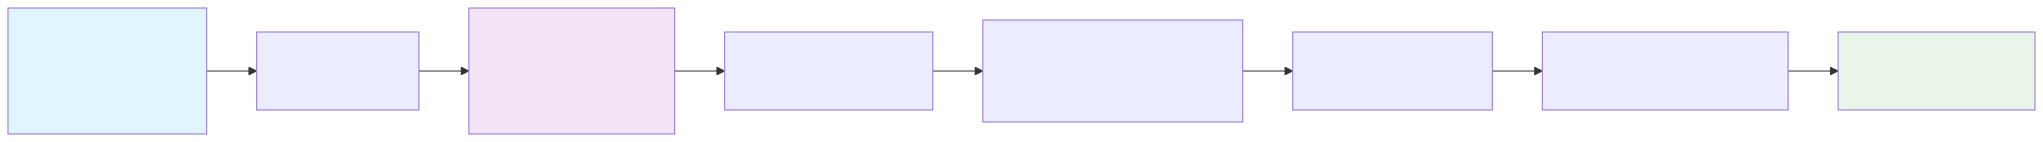

In [5]:
# @title
import base64
import requests
from IPython.display import SVG, display

def mm(graph: str) -> None:
    """
    Fetch and display a Mermaid diagram as SVG.

    Parameters:
      graph (str): Mermaid graph definition.
    """
    # 1. Encode the graph to Base64
    b64 = base64.urlsafe_b64encode(graph.encode('utf-8')).decode('ascii')
    # 2. Construct the SVG URL
    url = f'https://mermaid.ink/svg/{b64}'
    # 3. Fetch SVG content
    svg_data = requests.get(url).text
    # 4. Render inline in Jupyter
    display(SVG(data=svg_data))


mm("""
graph LR
    A[Java Source Code<br/>BankAccount.java<br/>VillainAccount.java<br/>MinionAccount.java] --> B[Java Compiler<br/>javac]
    B --> C[Java Bytecode<br/>BankAccount.class<br/>VillainAccount.class<br/>MinionAccount.class]
    C --> D[Java Virtual Machine<br/>JVM]
    D --> E[Class Loader<br/>Loads .class files into memory]
    E --> F[Bytecode Verifier<br/>Checks code safety]
    F --> G[Just-In-Time Compiler<br/>Converts to machine code]
    G --> H[Execution Engine<br/>Runs your program]

    style A fill:#e1f5fe
    style C fill:#f3e5f5
    style H fill:#e8f5e8""")

# Inside the Java Virtual Machine

The **Java Virtual Machine (JVM)** is like the engine room of the Bank of Evil's IT infrastructure. It's a sophisticated piece of software that manages every aspect of running your Java programs. Understanding its key components will help you write better code and debug problems more effectively.

When your banking application starts up, the JVM follows a specific sequence to get everything running:

1. **Class Loading**: The **Class Loader** finds and loads your compiled `.class` files into memory when they're needed. When Gru's banking application needs to create a new `VillainAccount` object, the class loader locates the `VillainAccount.class` file and brings it into the JVM's memory space.

2. **Memory Allocation**: The JVM sets up distinct **memory areas** for different purposes. The **heap** stores all object instances (every `BankAccount`, `VillainAccount`, and `MinionAccount` object lives here), while the **stack** holds method calls and local variables. There's also a **method area** where class-level information like static variables gets stored.

3. **Bytecode Execution**: The **Execution Engine** runs your bytecode instructions. Modern JVMs use **Just-In-Time (JIT) compilation** to convert frequently-used bytecode into optimized machine code for better performance.

This sophisticated process means that banking applications processing thousands of transactions actually get faster the longer they run, as the JVM learns which code paths are used most often and optimizes them accordingly.

# Bytecode Basics: What the JVM Actually Runs

While you write Java code in a human-friendly syntax, the JVM doesn't actually execute your original source code. Instead, it runs **bytecode** - a low-level representation of your program that's stored in `.class` files. Understanding what bytecode looks like can help you write more efficient code and debug performance issues.

Let's see what happens when we compile a simple method from our `BankAccount` class:

```java
// Original Java source code
public void deposit(double amount) {
    balance += amount;
}
```

After compilation, this becomes bytecode that looks something like this:

```
// Simplified bytecode representation
0: aload_0          // Load 'this' onto the stack
1: dup             // Duplicate 'this' reference
2: getfield #2     // Get the 'balance' field
5: dload_1         // Load 'amount' parameter
6: dadd            // Add amount to balance
7: putfield #2     // Store result back to 'balance' field
10: return         // Return from method
```

This bytecode is much more verbose than the original Java code, but it's also much more explicit about what operations the computer needs to perform. Each instruction tells the JVM exactly what to do with the data on the **operand stack** - a temporary workspace where the JVM manipulates values during execution.

Don't worry about memorizing bytecode instructions! The key insight is that understanding this process helps explain why certain Java operations are faster than others and why the JVM can optimize your code so effectively.

# The Class Loading Process

One of the most powerful features of Java is **dynamic class loading** - the ability to load classes into memory only when they're actually needed. This is crucial for large banking systems where you might have hundreds of different account types and transaction processors, but only use a few of them in any given session.

Here's a demonstration of class loading in action with our villain banking system:

In [33]:
%%writefile BankingSystem.java
public class BankingSystem {
    public static void main(String[] args) {
        System.out.println("Banking system starting...");

        // At this point, only BankingSystem class is loaded

        System.out.println("Creating Gru's account...");
        VillainAccount gru = new VillainAccount("V001", "Gru", "Moon Theft");
        // Now VillainAccount and BankAccount classes are loaded

        System.out.println("Hiring some minions...");
        MinionAccount bob = new MinionAccount("M001", "Bob", "Gru");
        // Now MinionAccount class is also loaded

        System.out.println("All systems operational!");
    }
}

Overwriting BankingSystem.java


In [34]:
!javac BankingSystem.java
!java BankingSystem

Banking system starting...
Creating Gru's account...
Hiring some minions...
All systems operational!



The **class loader** follows a specific process when it encounters a new class for the first time:

1. **Loading**: Find the `.class` file and read its bytecode into memory
2. **Linking**: Verify that the bytecode is valid and resolve references to other classes
3. **Initialization**: Execute any static initialization code in the class

This lazy loading approach means that Bank of Evil's software starts up quickly, even though it might have thousands of different class files available. Classes are only loaded when they're actually used, keeping memory usage efficient and startup times fast.

# Memory Management in Our Bank

Understanding how the JVM organizes memory is crucial for writing efficient banking software that can handle millions of transactions without running out of memory or slowing down. The JVM divides memory into distinct areas, each serving a specific purpose in your program's execution.

- The **stack memory** is where method calls and local variables live. Each time a banking method is called (like `deposit()` or `withdraw()`), the JVM creates a new **stack frame** containing the method's parameters and local variables. When the method finishes, its stack frame is immediately removed. This makes stack memory very fast and automatically managed - you never have to worry about cleaning it up.
- The **heap memory** is where all object instances are stored. Every `BankAccount`, `VillainAccount`, and `String` object lives in the heap. Unlike stack memory, heap objects don't get cleaned up automatically when a method ends. Instead, Java's **garbage collector** periodically scans the heap and removes objects that are no longer referenced by any part of your program.
- Finally, the **method area** (sometimes called the **metaspace**) stores class-level information that's shared across all instances. This includes the actual bytecode for your methods, static variables like `Bank.totalCustomers`, and constant values. This area is loaded once per class and shared by all objects of that type.

This memory organization allows the Bank of Evil's software to efficiently manage thousands of account objects while keeping method calls fast and memory usage under control.

In [8]:
# @title
%%html
<svg width = "60%" viewBox="0 0 900 800" xmlns="http://www.w3.org/2000/svg">
  <defs>
    <style>
      .title { font-family: Arial, sans-serif; font-size: 28px; font-weight: bold; fill: #2c3e50; }
      .subtitle { font-family: Arial, sans-serif; font-size: 18px; fill: #34495e; font-weight: 600; }
      .label { font-family: Arial, sans-serif; font-size: 15px; fill: #2c3e50; }
      .code { font-family: 'Courier New', monospace; font-size: 13px; fill: #2c3e50; }
      .code-keyword { fill: #8e44ad; font-weight: bold; }
      .code-type { fill: #2980b9; font-weight: bold; }
      .code-class { fill: #e67e22; font-weight: bold; }
      .stack-box { fill: #e8f4f8; stroke: #3498db; stroke-width: 3; }
      .heap-box { fill: #fff9e6; stroke: #f39c12; stroke-width: 3; }
      .metaspace-box { fill: #f4ecf7; stroke: #9b59b6; stroke-width: 3; }
      .frame-box { fill: #fff; stroke: #3498db; stroke-width: 2; }
      .object-box { fill: #fff; stroke: #f39c12; stroke-width: 2; }
      .class-box { fill: #fff; stroke: #9b59b6; stroke-width: 2; }
      .memory-label { font-family: Arial, sans-serif; font-size: 13px; fill: #7f8c8d; }
      .area-title { font-family: Arial, sans-serif; font-size: 18px; font-weight: bold; }
      .stack-title { fill: #3498db; }
      .heap-title { fill: #f39c12; }
      .metaspace-title { fill: #9b59b6; }
      .variable-name { font-family: 'Courier New', monospace; font-size: 13px; fill: #27ae60; font-weight: bold; }
      .value-text { font-family: 'Courier New', monospace; font-size: 14px; fill: #2c3e50; font-weight: bold; }
      .arrow { fill: none; stroke: #e74c3c; stroke-width: 2; marker-end: url(#arrowhead); }
      .arrow-label { font-family: Arial, sans-serif; font-size: 11px; fill: #e74c3c; }
    </style>
    <marker id="arrowhead" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#e74c3c" />
    </marker>
  </defs>

  <!-- Title -->
  <text x="450" y="35" class="title" text-anchor="middle">JVM Memory Areas</text>
  <text x="450" y="62" class="subtitle" text-anchor="middle">How Java manages memory at runtime</text>

  <!-- Code Example -->
  <rect x="50" y="85" width="800" height="85" rx="5" fill="#f8f9fa" stroke="#95a5a6" stroke-width="1"/>
  <text x="60" y="105" class="code"><tspan class="code-keyword">public class</tspan> <tspan class="code-class">Person</tspan> {</text>
  <text x="80" y="125" class="code"><tspan class="code-keyword">public static void</tspan> main(<tspan class="code-class">String</tspan>[] args) {</text>
  <text x="100" y="145" class="code"><tspan class="code-type">int</tspan> age = 25;</text>
  <text x="100" y="160" class="code"><tspan class="code-class">Person</tspan> p = <tspan class="code-keyword">new</tspan> <tspan class="code-class">Person</tspan>();</text>

  <!-- Stack Area -->
  <rect x="50" y="195" width="380" height="380" class="stack-box" rx="8"/>
  <text x="240" y="225" class="area-title stack-title" text-anchor="middle">Stack (Thread-Specific)</text>
  <text x="240" y="248" class="memory-label" text-anchor="middle">Stores method calls and local variables</text>

  <!-- Stack Frame for main() -->
  <rect x="70" y="265" width="340" height="140" class="frame-box" rx="5"/>
  <text x="80" y="285" class="label" font-weight="bold">Method Frame: main()</text>
  <text x="90" y="310" class="memory-label">Local Variables:</text>

  <!-- Local variable: age -->
  <rect x="100" y="320" width="120" height="35" fill="#e8f8f5" stroke="#27ae60" stroke-width="2" rx="3"/>
  <text x="110" y="337" class="variable-name">age</text>
  <text x="110" y="350" class="code">(int)</text>
  <text x="185" y="343" class="value-text" text-anchor="middle">25</text>

  <!-- Local variable: p (reference) -->
  <rect x="100" y="365" width="120" height="35" fill="#e8f8f5" stroke="#27ae60" stroke-width="2" rx="3"/>
  <text x="110" y="382" class="variable-name">p</text>
  <text x="110" y="395" class="code">(Person ref)</text>
  <text x="175" y="388" class="arrow-label" text-anchor="middle">→ heap</text>

  <!-- Arrow from p to heap -->
  <path d="M 220 382 L 260 382 L 260 470 L 470 470" class="arrow"/>

  <!-- Stack Frame explanation -->
  <rect x="70" y="420" width="340" height="145" fill="#f8f9fa" stroke="#95a5a6" stroke-width="1" rx="5"/>
  <text x="80" y="440" class="label" font-weight="bold">Stack Characteristics:</text>
  <text x="90" y="463" class="label">• Organized as LIFO (Last In, First Out)</text>
  <text x="90" y="483" class="label">• Each thread has its own stack</text>
  <text x="90" y="503" class="label">• Stores primitives directly</text>
  <text x="90" y="523" class="label">• Stores references to objects</text>
  <text x="90" y="543" class="label">• Fast allocation/deallocation</text>
  <text x="90" y="558" class="memory-label" font-style="italic">When method returns, frame is removed</text>

  <!-- Heap Area -->
  <rect x="470" y="195" width="380" height="380" class="heap-box" rx="8"/>
  <text x="660" y="225" class="area-title heap-title" text-anchor="middle">Heap (Shared)</text>
  <text x="660" y="248" class="memory-label" text-anchor="middle">Stores all objects and instance variables</text>

  <!-- Object in heap -->
  <rect x="490" y="265" width="340" height="140" class="object-box" rx="5"/>
  <text x="500" y="285" class="label" font-weight="bold">Person Object</text>
  <text x="510" y="310" class="memory-label">Instance Variables:</text>

  <rect x="520" y="320" width="130" height="30" fill="#fff9e6" stroke="#f39c12" stroke-width="1" rx="3"/>
  <text x="530" y="340" class="code">String name = "Alice"</text>

  <rect x="520" y="360" width="130" height="30" fill="#fff9e6" stroke="#f39c12" stroke-width="1" rx="3"/>
  <text x="530" y="380" class="code">int height = 165</text>

  <rect x="670" y="320" width="140" height="70" fill="#fff" stroke="#95a5a6" stroke-width="1" rx="3"/>
  <text x="680" y="340" class="memory-label" font-size="12">Objects can contain:</text>
  <text x="685" y="357" class="memory-label" font-size="11">• Instance variables</text>
  <text x="685" y="372" class="memory-label" font-size="11">• References to other</text>
  <text x="690" y="385" class="memory-label" font-size="11">objects</text>

  <!-- Heap explanation -->
  <rect x="490" y="420" width="340" height="145" fill="#f8f9fa" stroke="#95a5a6" stroke-width="1" rx="5"/>
  <text x="500" y="440" class="label" font-weight="bold">Heap Characteristics:</text>
  <text x="510" y="463" class="label">• Shared by all threads</text>
  <text x="510" y="483" class="label">• Stores ALL objects</text>
  <text x="510" y="503" class="label">• Managed by Garbage Collector</text>
  <text x="510" y="523" class="label">• Larger but slower than stack</text>
  <text x="510" y="543" class="label">• Objects persist until GC'd</text>
  <text x="510" y="558" class="memory-label" font-style="italic">Objects removed when no references exist</text>

  <!-- Metaspace Area -->
  <rect x="50" y="595" width="800" height="180" class="metaspace-box" rx="8"/>
  <text x="450" y="625" class="area-title metaspace-title" text-anchor="middle">Metaspace (Shared)</text>
  <text x="450" y="648" class="memory-label" text-anchor="middle">Stores class metadata and static variables</text>

  <rect x="70" y="665" width="240" height="95" class="class-box" rx="5"/>
  <text x="80" y="685" class="label" font-weight="bold">Class: Person</text>
  <text x="90" y="708" class="memory-label">• Class structure/methods</text>
  <text x="90" y="728" class="memory-label">• Static variables</text>
  <text x="90" y="748" class="memory-label">• Method bytecode</text>

  <rect x="330" y="665" width="240" height="95" class="class-box" rx="5"/>
  <text x="340" y="685" class="label" font-weight="bold">Class: String</text>
  <text x="350" y="708" class="memory-label">• Class structure/methods</text>
  <text x="350" y="728" class="memory-label">• Static variables</text>
  <text x="350" y="748" class="memory-label">• Method bytecode</text>

  <rect x="590" y="665" width="240" height="95" fill="#f8f9fa" stroke="#95a5a6" stroke-width="1" rx="5"/>
  <text x="600" y="685" class="label" font-weight="bold">Metaspace Properties:</text>
  <text x="610" y="708" class="label">• Loaded at class loading time</text>
  <text x="610" y="728" class="label">• Shared across all threads</text>
  <text x="610" y="748" class="label">• Native memory (not in heap)</text>
</svg>

# Static vs Instance: Where Things Live in Memory

Understanding the difference between **static** and **instance** members is essential for banking software architecture. This distinction affects not only how your code behaves, but also where data is stored in memory and how efficiently your programs run.

Let's enhance our `Bank` class to demonstrate both types of members:


In [9]:
%%writefile Bank.java
public class Bank {
    // Static variables - shared by ALL instances
    private static int totalAccounts = 0;
    private static double totalAssets = 0.0;
    private static final String BANK_NAME = "Bank of Evil";

    // Instance variables - unique to each Bank branch
    private String branchLocation;
    private String branchManager;
    private int localAccountCount;

    public Bank(String location, String manager) {
        this.branchLocation = location;
        this.branchManager = manager;
        this.localAccountCount = 0;
        totalAccounts++; // Increment the shared counter
    }

    // Static method - can be called without creating an instance
    public static String getBankName() {
        return BANK_NAME;
    }

    // Instance method - needs a specific Bank object
    public String getBranchInfo() {
        return branchLocation + " managed by " + branchManager;
    }
}


Writing Bank.java


In [10]:
!javac Bank.java

/bin/bash: line 1: javac: command not found



Here's how these different types of members are stored in memory:

- **Static variables** like `totalAccounts` exist once in the method area, shared by all Bank objects
- **Instance variables** like `branchLocation` are stored in heap memory, with each Bank object having its own copy
- **Static methods** like `getBankName()` can be called using just the class name: `Bank.getBankName()`
- **Instance methods** like `getBranchInfo()` require a specific object: `grusBank.getBranchInfo()`

This design allows the Bank of Evil to track global statistics (like total assets across all branches) while still maintaining branch-specific information for each location.

# Compilation Errors vs Runtime Errors

As a programmer for the Bank of Evil, you'll encounter two fundamentally different types of errors, and understanding when each occurs can save you hours of debugging time. The timing of when errors are caught makes a huge difference in how quickly you can fix them and how they affect your users.

**Compilation errors** occur when the Java compiler (`javac`) can't convert your source code into bytecode. These are caught before your program ever runs, which makes them relatively easy to fix since you get immediate feedback. **Runtime errors** happen while your program is executing, often in response to unexpected conditions or user input.

Here's a comparison of common error types in banking software:

| Error Type | When Detected | Example | Impact |
|------------|---------------|---------|---------|
| **Syntax Error** | Compile time | Missing semicolon, mismatched braces | Program won't compile |
| **Type Error** | Compile time | Assigning String to int variable | Program won't compile |
| **Logic Error** | Runtime | Withdrawing negative amounts | Program runs but behaves incorrectly |
| **Exception** | Runtime | Dividing by zero, null pointer access | Program may crash unless handled |

The key insight is that compilation errors prevent your banking software from running at all, while runtime errors can cause crashes or incorrect behavior after the software has been deployed to production. This is why understanding both the compilation process and exception handling is so critical for building reliable financial systems.

Catching errors early in the development process is always preferable to discovering them when Gru is trying to fund his latest scheme and the banking system crashes!

# The Power of Early Error Detection

The Java compiler is like having a vigilant security guard at the Bank of Evil who catches problems before they can cause real damage. Understanding how the compilation process helps prevent errors will make you a more effective programmer and help you build more reliable banking systems.

1. **Strong Type Checking** is one of Java's greatest strengths. The compiler verifies that you're not trying to store a villain's name (a String) in a field meant for their account balance (a double).
    - This prevents a whole class of bugs that could corrupt financial data. When you write `balance = "Gru"` instead of `balance = 1000000.0`, the compiler immediately flags this as an error rather than letting it cause problems later.
2. **Method Signature Verification** ensures that when you call a method, you're providing the right number and types of parameters.
    - If you try to call `deposit("fifty dollars")` instead of `deposit(50.0)`, the compiler catches this mistake before the banking software ever runs. This prevents runtime crashes when customers are trying to access their accounts.
3. **Access Control Enforcement** happens at compile time as well. If you try to access a private field from outside its class, or call a protected method from an unauthorized location, the compiler stops you.
    - This enforces the security boundaries that are crucial for banking software - you can't accidentally expose sensitive account information or bypass security checks.

The key insight is that every error caught at compile time is an error that won't surprise you (or crash on your users) at runtime. This front-loaded error detection is what makes Java particularly well-suited for building large, reliable financial systems where bugs can have serious consequences. It's much better to spend a few extra minutes fixing compilation errors than to have the Bank of Evil's systems crash during Gru's next big heist!

## Exercise 1: Evil Scheme Investment Tracker

Imagine you work for the Bank of Evil's investment department. Villains come to you with their evil schemes, and you need to track how much money is being invested in each scheme.

Your program will:
- Store information about each evil scheme (who's behind it, what it's called, and how much it costs)
- Keep a list of all schemes in the bank's portfolio
- Calculate the total amount invested across all schemes
- Find which scheme costs the most money
- Display a report of all schemes

For example, if Gru wants to invest \$1,000,000 in "Moon Theft" and Vector wants \$2,000,000 for his "Pyramid Scheme", your program should be able to store both, tell you that the total investment is \$3,000,000, and identify Vector's scheme as the most expensive.

## Starter Code

In [11]:
%%writefile InvestmentTracker.java
import java.util.ArrayList;

class EvilScheme {
    // TODO: Add three private fields:
    // - schemeName (String)
    // - villainName (String)
    // - cost (double)

    // TODO: Create a constructor that takes all three values as parameters
    // and assigns them to the fields

    // TODO: Create getter methods: getSchemeName(), getVillainName(), getCost()

    // TODO: Create a displayInfo() method that prints:
    // "Scheme: [name] by [villain] - Cost: $[cost]"
}

public class InvestmentTracker {
    private ArrayList<EvilScheme> schemes;
    private static int totalSchemesTracked = 0;

    public InvestmentTracker() {
        schemes = new ArrayList<>();
    }

    // TODO: Complete this method
    // Add the scheme to the ArrayList
    // Increment totalSchemesTracked by 1
    public void addScheme(EvilScheme scheme) {

    }

    // TODO: Complete this method
    // Use a loop to go through all schemes in the ArrayList
    // Add up all their costs and return the total
    public double calculateTotalInvestment() {
        return 0.0;
    }

    // TODO: Complete this method
    // Loop through all schemes to find the one with the highest cost
    // Return that scheme (or null if the list is empty)
    // Hint: Keep track of the most expensive scheme as you loop
    public EvilScheme findMostExpensiveScheme() {
        return null;
    }

    // TODO: Complete this method
    // Loop through all schemes and call displayInfo() on each one
    public void displayAllSchemes() {

    }

    public static void main(String[] args) {
        System.out.println("=== Bank of Evil Investment Tracker ===\n");

        // TODO: Create an InvestmentTracker object

        // TODO: Create 4-5 EvilScheme objects with different villains and amounts
        // Example: new EvilScheme("Moon Theft", "Gru", 1000000.0)

        // TODO: Add each scheme to your tracker

        // TODO: Call displayAllSchemes() to show all schemes

        // TODO: Calculate and print the total investment

        // TODO: Find and display the most expensive scheme

        System.out.println("\nTotal schemes tracked: " + totalSchemesTracked);
    }
}


Writing InvestmentTracker.java


In [12]:
!javac InvestmentTracker.java
!java InvestmentTracker

/bin/bash: line 1: javac: command not found
/bin/bash: line 1: java: command not found


# When Things Go Wrong: Welcome to Exceptions

Even the most carefully planned villain schemes can go awry, and the same is true for software programs. You've probably already encountered situations where your Java programs crashed with cryptic error messages like "NullPointerException" or "ArrayIndexOutOfBoundsException." These crashes are actually Java's **exception system** in action.

An **exception** is Java's way of signaling that something has gone wrong during program execution that prevents normal operation from continuing. When an exception occurs, Java stops executing the current method and looks for code that knows how to handle that specific problem. If no handling code is found, the program terminates and prints an error message.

Let's look at a simple example that demonstrates how exceptions work. Consider this basic banking code:

```java



In [13]:
%%writefile SimpleAccount.java
public class SimpleAccount {
    private double balance = 1000.0;

    public void printAccountInfo() {
        String accountName = null; // Whoops! This should be initialized
        System.out.println("Account holder: " + accountName.toUpperCase());
        System.out.println("Balance: $" + balance);
    }

    public static void main (String[] args){
        SimpleAccount account = new SimpleAccount();
        account.printAccountInfo();
    }

}


Writing SimpleAccount.java


In [14]:
!javac SimpleAccount.java
!java SimpleAccount

/bin/bash: line 1: javac: command not found
/bin/bash: line 1: java: command not found


When you run this code, Java throws a **NullPointerException** because we're trying to call the `toUpperCase()` method on a `null` reference. The program crashes with an error message, but at least it tells us exactly what went wrong and where.

Understanding exceptions helps you write more reliable banking software because you can anticipate these problems and handle them gracefully instead of letting the entire Bank of Evil system crash when something unexpected happens.

# The Exception Hierarchy

Java organizes all exceptions into a well-structured hierarchy that helps you understand how different types of errors should be handled. Before we create our own banking exceptions, let's understand the built-in exceptions that Java provides and how they're organized.

At the top of the hierarchy is **Throwable**, the parent class for all objects that can be "thrown" as exceptions. You don't need to work with Throwable directly - it's mainly important to know that it exists and provides common functionality like error messages and stack traces.

The two main branches under Throwable are **Error** and **Exception**.

**Error** represents serious system problems like running out of memory - these are usually beyond your program's control, and you typically don't try to handle them in banking software.

**Exception** is where things get interesting for application programmers. This branch contains two important subcategories:

- **RuntimeException** and its subclasses are **unchecked exceptions** that Java doesn't force you to handle explicitly. Common examples include `NullPointerException` (trying to use a null reference), `ArrayIndexOutOfBoundsException` (accessing an invalid array position), and `NumberFormatException` (trying to convert invalid text to a number).

- All other Exception subclasses are **checked exceptions** that must be explicitly handled or declared in method signatures. Examples include `IOException` for file problems and `SQLException` for database errors.

For now, we'll focus on understanding and handling the common RuntimeExceptions that occur frequently in everyday programming. Once you're comfortable with exception handling basics, we'll explore checked exceptions and creating custom banking exceptions like `InsufficientFundsException`.

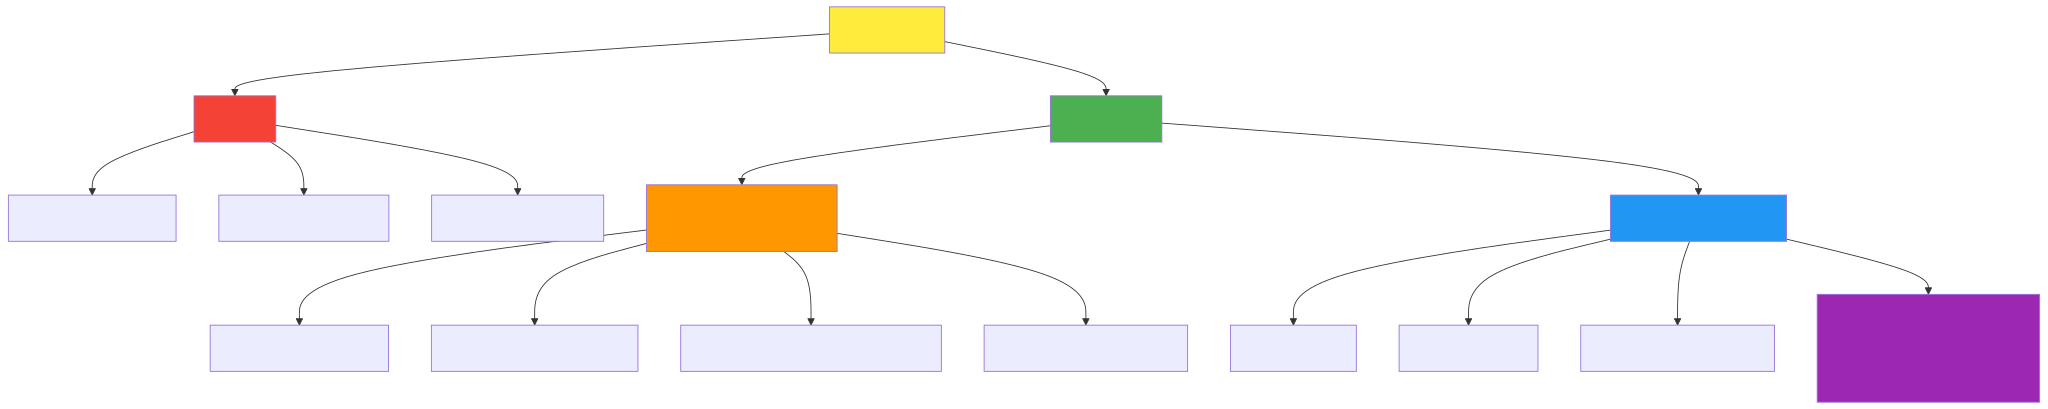

In [15]:
# @title
mm("""
graph TD
    A[Throwable] --> B[Error]
    A --> C[Exception]

    B --> B1[OutOfMemoryError]
    B --> B2[StackOverflowError]
    B --> B3[VirtualMachineError]

    C --> D[RuntimeException<br/>Unchecked Exceptions]
    C --> E[Checked Exceptions]

    D --> D1[NullPointerException]
    D --> D2[IllegalArgumentException]
    D --> D3[ArrayIndexOutOfBoundsException]
    D --> D4[NumberFormatException]

    E --> E1[IOException]
    E --> E2[SQLException]
    E --> E3[FileNotFoundException]
    E --> E4[Custom Banking Exceptions<br/>InsufficientFundsException<br/>AccountFrozenException]

    style A fill:#ffeb3b
    style B fill:#f44336
    style C fill:#4caf50
    style D fill:#ff9800
    style E fill:#2196f3
    style E4 fill:#9c27b0""")

# Common Exceptions You'll Encounter

Before we learn how to handle exceptions, let's see the most common built-in exceptions that occur in everyday programming. Understanding these will help you recognize what's happening when your banking programs crash and give you the foundation for writing better error handling.

Here's a table of common Java exceptions:

| Exception | Description | Sample Code |
|-----------|-------------|-------------|
| **NullPointerException** | Trying to use a null object reference | `String s = null;`<br>`s.length();` |
| **ArrayIndexOutOfBoundsException** | Accessing array with invalid index | `int[] arr = {1, 2};`<br>`arr[5];` |
| **NumberFormatException** | Invalid string-to-number conversion | `Integer.parseInt("abc");` |
| **IllegalArgumentException** | Method receives inappropriate argument | `Thread.sleep(-1);` |
| **ClassCastException** | Invalid type casting | `Object o = "text";`<br>`Integer i = (Integer) o;` |
| **FileNotFoundException** | File doesn't exist at specified path | `new FileReader("missing.txt");` |
| **IOException** | General I/O operation failure | `reader.read();` // on closed stream |
| **ArithmeticException** | Illegal arithmetic operation | `int x = 5 / 0;` |
| **IllegalStateException** | Object in wrong state for operation | `iterator.next();` // after last element |
| **IndexOutOfBoundsException** | Index out of range (List, String, etc.) | `list.get(999);` // on small list |
| **NoSuchElementException** | Accessing element that doesn't exist | `Scanner s = new Scanner("");`<br>`s.next();` |
| **ConcurrentModificationException** | Modifying collection during iteration | `for(String s : list)`<br>`list.remove(s);` |




Each of these exceptions provides useful information about what went wrong. When a `NullPointerException` occurs, Java tells you exactly which line tried to use a null reference. When you get an `ArrayIndexOutOfBoundsException`, the error message shows you which index was invalid.

The key insight is that these exceptions aren't just random crashes - they're Java's way of providing detailed diagnostic information about specific problems in your code. Once you understand what each exception means, you can start writing code that anticipates and handles these situations gracefully instead of crashing.

In the next slides, we'll learn how to catch these exceptions and respond to them appropriately in banking software.

In [16]:
# @title
%%html
<svg width = "60%" viewBox="0 0 900 850" xmlns="http://www.w3.org/2000/svg">
  <defs>
    <style>
      .title { font-family: Arial, sans-serif; font-size: 28px; font-weight: bold; fill: #2c3e50; }
      .subtitle { font-family: Arial, sans-serif; font-size: 18px; fill: #34495e; font-weight: 600; }
      .label { font-family: Arial, sans-serif; font-size: 15px; fill: #2c3e50; }
      .code { font-family: 'Courier New', monospace; font-size: 14px; fill: #2c3e50; }
      .code-keyword { fill: #8e44ad; font-weight: bold; }
      .code-type { fill: #2980b9; font-weight: bold; }
      .code-class { fill: #e67e22; font-weight: bold; }
      .code-error { fill: #c0392b; font-weight: bold; }
      .error-box { fill: #fadbd8; stroke: #e74c3c; stroke-width: 3; }
      .normal-box { fill: #e8f8f5; stroke: #27ae60; stroke-width: 2; }
      .catch-box { fill: #fff9e6; stroke: #f39c12; stroke-width: 3; }
      .step-circle { fill: #e74c3c; }
      .step-number { font-family: Arial, sans-serif; font-size: 16px; fill: #fff; font-weight: bold; }
      .memory-label { font-family: Arial, sans-serif; font-size: 13px; fill: #7f8c8d; }
      .arrow-down { fill: none; stroke: #e74c3c; stroke-width: 3; marker-end: url(#arrowhead); }
      .arrow-catch { fill: none; stroke: #f39c12; stroke-width: 3; marker-end: url(#arrowhead-catch); stroke-dasharray: 5,5; }
      .crash-text { font-family: Arial, sans-serif; font-size: 16px; fill: #c0392b; font-weight: bold; }
    </style>
    <marker id="arrowhead" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#e74c3c" />
    </marker>
    <marker id="arrowhead-catch" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#f39c12" />
    </marker>
  </defs>

  <!-- Title -->
  <text x="450" y="35" class="title" text-anchor="middle">How Exceptions Work</text>
  <text x="450" y="62" class="subtitle" text-anchor="middle">Example: NullPointerException</text>

  <!-- Without Try-Catch Column -->
  <text x="220" y="100" class="subtitle" text-anchor="middle" fill="#c0392b">Without Try-Catch (Program Crashes)</text>

  <!-- Step 1 -->
  <circle cx="70" cy="135" r="18" class="step-circle"/>
  <text x="70" y="141" class="step-number" text-anchor="middle">1</text>

  <rect x="100" y="120" width="340" height="60" class="normal-box" rx="5"/>
  <text x="110" y="143" class="code"><tspan class="code-class">String</tspan> name = <tspan class="code-keyword">null</tspan>;</text>
  <text x="110" y="165" class="memory-label">Variable name points to nothing</text>

  <!-- Step 2 -->
  <circle cx="70" cy="215" r="18" class="step-circle"/>
  <text x="70" y="221" class="step-number" text-anchor="middle">2</text>

  <rect x="100" y="200" width="340" height="80" class="error-box" rx="5"/>
  <text x="110" y="223" class="code"><tspan class="code-type">int</tspan> len = name.length();</text>
  <text x="110" y="245" class="memory-label">Trying to call method on null!</text>
  <text x="110" y="265" class="code-error">❌ NullPointerException thrown</text>

  <!-- Arrow down -->
  <path d="M 270 285 L 270 315" class="arrow-down"/>

  <!-- Step 3 -->
  <circle cx="70" cy="340" r="18" class="step-circle"/>
  <text x="70" y="346" class="step-number" text-anchor="middle">3</text>

  <rect x="100" y="325" width="340" height="100" class="error-box" rx="5"/>
  <text x="270" y="355" class="crash-text" text-anchor="middle">PROGRAM CRASHES</text>
  <text x="110" y="378" class="memory-label">JVM stops execution immediately</text>
  <text x="110" y="395" class="memory-label">Error printed to console:</text>
  <text x="120" y="413" class="code" font-size="11">Exception in thread "main"</text>
  <text x="120" y="425" class="code" font-size="11">java.lang.NullPointerException</text>

  <!-- With Try-Catch Column -->
  <text x="660" y="100" class="subtitle" text-anchor="middle" fill="#27ae60">With Try-Catch (Program Continues)</text>

  <!-- Step 1 -->
  <circle cx="490" cy="135" r="18" class="step-circle"/>
  <text x="490" y="141" class="step-number" text-anchor="middle">1</text>

  <rect x="520" y="120" width="340" height="60" class="normal-box" rx="5"/>
  <text x="530" y="143" class="code"><tspan class="code-class">String</tspan> name = <tspan class="code-keyword">null</tspan>;</text>
  <text x="530" y="165" class="memory-label">Variable name points to nothing</text>

  <!-- Step 2 -->
  <circle cx="490" cy="215" r="18" class="step-circle"/>
  <text x="490" y="221" class="step-number" text-anchor="middle">2</text>

  <rect x="520" y="200" width="340" height="100" class="normal-box" rx="5"/>
  <text x="530" y="223" class="code"><tspan class="code-keyword">try</tspan> {</text>
  <text x="550" y="243" class="code"><tspan class="code-type">int</tspan> len = name.length();</text>
  <text x="530" y="263" class="code">}</text>
  <text x="530" y="285" class="memory-label">Exception thrown inside try block</text>

  <!-- Arrow to catch -->
  <path d="M 690 305 L 690 330" class="arrow-catch"/>
  <text x="710" y="320" class="memory-label">caught!</text>

  <!-- Step 3 -->
  <circle cx="490" cy="355" r="18" class="step-circle"/>
  <text x="490" y="361" class="step-number" text-anchor="middle">3</text>

  <rect x="520" y="340" width="340" height="100" class="catch-box" rx="5"/>
  <text x="530" y="363" class="code"><tspan class="code-keyword">catch</tspan> (<tspan class="code-class">NullPointerException</tspan> e) {</text>
  <text x="550" y="383" class="code">System.out.println(<tspan class="code-error">"Error!"</tspan>);</text>
  <text x="530" y="403" class="code">}</text>
  <text x="530" y="425" class="memory-label">Exception handled gracefully</text>

  <!-- Step 4 -->
  <circle cx="490" cy="465" r="18" class="step-circle"/>
  <text x="490" y="471" class="step-number" text-anchor="middle">4</text>

  <rect x="520" y="450" width="340" height="60" class="normal-box" rx="5"/>
  <text x="530" y="473" class="code">System.out.println(<tspan class="code-error">"Done"</tspan>);</text>
  <text x="530" y="495" class="memory-label" fill="#27ae60" font-weight="bold">✓ Program continues normally!</text>

  <!-- Exception Flow Diagram -->
  <rect x="50" y="530" width="800" height="290" rx="8" fill="#f8f9fa" stroke="#34495e" stroke-width="2"/>
  <text x="450" y="560" class="subtitle" text-anchor="middle">How Exception Handling Works</text>

  <!-- Try block -->
  <rect x="80" y="585" width="180" height="80" fill="#e8f8f5" stroke="#27ae60" stroke-width="2" rx="5"/>
  <text x="170" y="608" class="label" text-anchor="middle" font-weight="bold">try { }</text>
  <text x="90" y="630" class="memory-label">Code that might</text>
  <text x="90" y="647" class="memory-label">throw exception</text>

  <!-- Arrow -->
  <path d="M 270 625 L 320 625" stroke="#e74c3c" stroke-width="2" marker-end="url(#arrowhead)"/>
  <text x="295" y="615" class="memory-label">if error</text>

  <!-- Catch block -->
  <rect x="330" y="585" width="180" height="80" fill="#fff9e6" stroke="#f39c12" stroke-width="2" rx="5"/>
  <text x="420" y="608" class="label" text-anchor="middle" font-weight="bold">catch (Exception e) { }</text>
  <text x="340" y="630" class="memory-label">Handle the error</text>
  <text x="340" y="647" class="memory-label">and recover</text>

  <!-- Arrow down -->
  <path d="M 420 670 L 420 695" stroke="#27ae60" stroke-width="2" marker-end="url(#arrowhead)"/>

  <!-- Continue -->
  <rect x="330" y="700" width="180" height="60" fill="#e8f8f5" stroke="#27ae60" stroke-width="2" rx="5"/>
  <text x="420" y="728" class="label" text-anchor="middle" font-weight="bold">Program continues</text>
  <text x="420" y="748" class="memory-label" text-anchor="middle">Next statement executes</text>

  <!-- Key Points -->
  <rect x="540" y="585" width="300" height="175" fill="#fff" stroke="#95a5a6" stroke-width="1" rx="5"/>
  <text x="550" y="608" class="label" font-weight="bold">Key Points:</text>
  <text x="560" y="633" class="label">• Exception = error object</text>
  <text x="560" y="655" class="label">• JVM creates exception when</text>
  <text x="570" y="673" class="label">error occurs</text>
  <text x="560" y="695" class="label">• catch block receives the</text>
  <text x="570" y="713" class="label">exception object</text>
  <text x="560" y="735" class="label">• Variable 'e' holds exception</text>
  <text x="570" y="753" class="label">details</text>

  <!-- Common Methods -->
  <rect x="80" y="690" width="240" height="120" fill="#fff" stroke="#95a5a6" stroke-width="1" rx="5"/>
  <text x="90" y="713" class="label" font-weight="bold">Exception Object Methods:</text>
  <text x="100" y="738" class="code">e.getMessage()</text>
  <text x="100" y="758" class="code">e.printStackTrace()</text>
  <text x="100" y="778" class="code">e.toString()</text>
  <text x="100" y="798" class="memory-label">Use these to get error details</text>
</svg>

# Try-Catch: Protecting Our Evil Plans

Now that you understand what exceptions are and why they occur, let's learn how to handle them gracefully instead of letting them crash your banking programs. The **try-catch** statement is Java's primary mechanism for exception handling, allowing your code to attempt risky operations while providing backup plans when things go wrong.

The basic syntax of try-catch follows a simple pattern:

```java
try {
    // Code that might throw an exception
} catch (ExceptionType e) {
    // Code to handle the exception
}
```

Let's see this in action with a practical banking example. Suppose we're reading account numbers from user input, which might not always be valid numbers:


In [17]:
%%writefile AccountNumberValidator.java
public class AccountNumberValidator {
    public static void validateAccountNumber(String input) {
        try {
            // Attempt to convert the input to a number
            long accountNumber = Long.parseLong(input);
            System.out.println("Valid account number: " + accountNumber);

        } catch (NumberFormatException e) {
            // Handle the case where input isn't a valid number
            System.out.println("Error: '" + input + "' is not a valid account number");
            System.out.println("Please enter numbers only (e.g., 1234567890)");
        }

        System.out.println("Account validation complete.\n");
    }

    public static void main(String[] args) {
        // Test cases to demonstrate exception handling
        validateAccountNumber("1234567890");  // Valid - should work
        validateAccountNumber("abc123");      // Invalid - will throw exception
        validateAccountNumber("Gru's account"); // Invalid - will throw exception
        validateAccountNumber("9876543210");  // Valid - should work
    }
}


Writing AccountNumberValidator.java


In [18]:
!javac AccountNumberValidator.java
!java AccountNumberValidator

/bin/bash: line 1: javac: command not found
/bin/bash: line 1: java: command not found



The beauty of this approach is that your program doesn't crash when Gru accidentally types "my account" instead of "1234567890" for his account number. Instead, the `catch` block executes, provides a helpful error message, and allows the program to continue running.

Notice that the code after the try-catch block always executes, regardless of whether an exception occurred. This makes try-catch perfect for maintaining the flow of your banking applications even when individual operations fail.

# Multiple Catch Blocks: Handling Different Disasters

Banking software often needs to handle several different types of exceptions in a single operation. For example, when processing a withdrawal request, you might encounter invalid input, null references, or mathematical errors. Java allows you to handle each type of exception differently using **multiple catch blocks**.

Here's how you can catch and handle different exceptions with specific responses for each:


In [19]:
%%writefile WithdrawalProcessor.java
public class WithdrawalProcessor {
    public static void processWithdrawal(String amountText, BankAccount account) {
        try {
            // Multiple things could go wrong here...
            double amount = Double.parseDouble(amountText); // NumberFormatException

            String accountInfo = account.getAccountNumber(); // NullPointerException if account is null

            if (amount > account.getBalance()) {
                throw new IllegalArgumentException("Insufficient funds");
            }

            // Simulate withdrawal
            System.out.println("Withdrawal of $" + amount + " successful!");

        } catch (NumberFormatException e) {
            System.out.println("Invalid amount: Please enter a valid number");
            System.out.println("You entered: " + amountText);

        } catch (NullPointerException e) {
            System.out.println("Error: No account provided for withdrawal");
            System.out.println("Please select an account first");

        } catch (IllegalArgumentException e) {
            System.out.println("Transaction denied: " + e.getMessage());
        }

        System.out.println("Processing complete.\n");
    }

    public static void main(String[] args) {
        BankAccount gru = new BankAccount("V001", "Gru");

        // Test different exception scenarios
        processWithdrawal("100.50", gru);     // Should work
        processWithdrawal("bad amount", gru); // NumberFormatException
        processWithdrawal("50.00", null);     // NullPointerException
        processWithdrawal("999999", gru);     // IllegalArgumentException
    }
}


Writing WithdrawalProcessor.java


In [20]:
!javac WithdrawalProcessor.java
!java WithdrawalProcessor

/bin/bash: line 1: javac: command not found
/bin/bash: line 1: java: command not found



The key points about multiple catch blocks:

1. **Order matters**: Java checks catch blocks from top to bottom and executes the first one that matches the exception type
2. **Specific handling**: Each catch block can provide different error messages and recovery actions appropriate for that specific problem
3. **Only one executes**: If an exception occurs, only the matching catch block runs - the others are skipped

This approach allows the Bank of Evil's software to provide helpful, specific error messages rather than generic "something went wrong" responses that frustrate both villains and minions alike.

# The Finally Block: Cleanup After Chaos

Sometimes your banking code needs to perform cleanup operations regardless of whether an exception occurred or not. For example, you might need to close database connections, unlock security systems, or log transaction attempts. The **finally block** ensures that critical cleanup code always executes, making it perfect for these scenarios.

The finally block has a simple but powerful guarantee: **it always executes**, whether the try block succeeds, fails with an exception, or even if a catch block handles an exception.

Here's the complete try-catch-finally syntax:

```java
try {
    // Risky code that might throw exceptions
} catch (ExceptionType e) {
    // Handle specific exceptions
} finally {
    // Cleanup code that ALWAYS runs
}
```

Let's see this in action with a Bank of Evil vault access system:


In [21]:
%%writefile VaultAccessSystem.java
public class VaultAccessSystem {
    private static boolean vaultLocked = true;

    public static void accessVault(String securityCode) {
        try {
            // Unlock the vault for access
            System.out.println("Attempting to unlock vault...");
            vaultLocked = false;

            // Verify the security code (might throw NumberFormatException)
            int code = Integer.parseInt(securityCode);

            if (code != 12345) {
                throw new IllegalArgumentException("Invalid security code");
            }

            System.out.println("Vault access granted! Evil schemes await!");

        } catch (NumberFormatException e) {
            System.out.println("Security code must be numeric");

        } catch (IllegalArgumentException e) {
            System.out.println("Access denied: " + e.getMessage());

        } finally {
            // Always lock the vault again, no matter what happened
            vaultLocked = true;
            System.out.println("Vault secured and locked.\n");
        }
    }

    public static void main(String[] args) {
        // Test different access scenarios
        accessVault("12345");    // Correct code - should succeed
        accessVault("54321");    // Wrong code - IllegalArgumentException
        accessVault("abc");      // Invalid format - NumberFormatException
        accessVault("12345");    // Correct again - should succeed

        System.out.println("Notice how the vault is always locked after each attempt!");
    }
}


Writing VaultAccessSystem.java


In [22]:
!javac VaultAccessSystem.java
!java VaultAccessSystem

/bin/bash: line 1: javac: command not found
/bin/bash: line 1: java: command not found



In this example, the vault gets locked again whether the access succeeds, the security code is invalid, or any other error occurs. This ensures that the Bank of Evil's assets remain secure even if something goes wrong during the access attempt.

The finally block is essential for resource management and security in banking applications - it guarantees that cleanup operations happen even in exceptional circumstances.

# Exercise: Practice Exception Handling

Now that you've learned the basics of try-catch blocks, let's practice with a more comprehensive banking scenario. The Bank of Evil's ATM system has several operations that can fail in different ways, and your job is to add proper exception handling to make it robust.

Here's the problematic ATM code that needs exception handling:


In [23]:
%%writefile EvilATM.java
public class EvilATM {

    public static void processTransaction(String operation, String accountId, String amountStr) {
        // TODO: Add try-catch blocks to handle potential exceptions

        System.out.println("Processing " + operation + " for account " + accountId);

        // This might throw NumberFormatException
        double amount = Double.parseDouble(amountStr);

        // This might throw NullPointerException if accountId is null
        String upperAccountId = accountId.toUpperCase();

        // This might throw IllegalArgumentException for negative amounts
        if (amount < 0) {
            throw new IllegalArgumentException("Amount cannot be negative: $" + amount);
        }

        // Simulate different operations
        if (operation.equals("WITHDRAW")) {
            System.out.println("Withdrew $" + amount + " from account " + upperAccountId);
        } else if (operation.equals("DEPOSIT")) {
            System.out.println("Deposited $" + amount + " to account " + upperAccountId);
        }

        // TODO: Add finally block that prints "Transaction attempt completed"
    }

    public static void main(String[] args) {
        // Test cases - some will cause exceptions!
        processTransaction("WITHDRAW", "V001", "100.50");  // Should work
        processTransaction("DEPOSIT", "M002", "fifty");    // NumberFormatException
        processTransaction("WITHDRAW", null, "75.00");     // NullPointerException
        processTransaction("DEPOSIT", "V003", "-25.00");   // IllegalArgumentException
        processTransaction("WITHDRAW", "M001", "200.00");  // Should work
    }
}


Writing EvilATM.java


In [24]:
!javac EvilATM.java
!java EvilATM

/bin/bash: line 1: javac: command not found
/bin/bash: line 1: java: command not found



**Your Tasks:**

1. **Add a try-catch structure** around the risky code in `processTransaction`
2. **Handle NumberFormatException** with a message like "Invalid amount format"  
3. **Handle NullPointerException** with a message like "Account ID cannot be null"
4. **Handle IllegalArgumentException** with a message showing what went wrong
5. **Add a finally block** that always prints "Transaction attempt completed"
6. **Run the program** and verify that all test cases are handled gracefully

The goal is to make the ATM continue processing other transactions even when individual transactions fail due to bad input or other problems.

# Checked vs Unchecked Exceptions

Now that you're comfortable with basic exception handling, it's important to understand that Java treats different types of exceptions differently. This distinction affects how you write your code and what the compiler requires you to do when handling various error conditions.

- **Unchecked exceptions** are the ones you've been working with so far - `NullPointerException`, `IllegalArgumentException`, `NumberFormatException`, and others that extend `RuntimeException`. These are called "unchecked" because the Java compiler doesn't force you to handle them.
    - You can choose to catch them with try-catch blocks, but you're not required to. If you don't catch them and they occur, your program will crash with a stack trace.
- **Checked exceptions** are different - the compiler requires you to either catch them or declare that your method might throw them. If you call a method that might throw a checked exception, your code won't compile unless you handle it.
    - Common checked exceptions include `IOException` (for file operations), `SQLException` (for database operations), and `ClassNotFoundException` (when the JVM can't find a class file).

For example, the following code block will NOT compile because it doesn't catch a checked exception:

```java
public class BankAccount {
    public void transferFunds(String accountFile, double amount) {
        FileReader reader = new FileReader(accountFile);  // ❌ COMPILE ERROR!
        // Process transfer from file...
    }
}
```
This will give something like:

`Compiler error: Unhandled exception: java.io.FileNotFoundException`

This won't compile because `FileNotFoundException` is checked - you MUST either:

1. Wrap it in try-catch, OR
2. Add `throws FileNotFoundException` to the method signature

Option 1:
```java
public class BankAccount {
    public void transferFunds(String accountFile, double amount)  {
      try{
        FileReader reader = new FileReader(accountFile);
        // Process transfer from file...
      }
      catch(FileNotFoundException){
      }
    }
}
```

Option 2:

```java
public class BankAccount {
    public void transferFunds(String accountFile, double amount) throws FileNotFoundException {
        FileReader reader = new FileReader(accountFile);
        // Process transfer from file...
    }
}
```

## Checked Exceptions
*Must be caught or declared - represent expected external failures*

| Exception | Why It's Checked | Description |
|-----------|------------------|-------------|
| `IOException` | External I/O can fail unpredictably | General input/output operation failure |
| `FileNotFoundException` | Files may not exist at runtime | Specific file cannot be found or opened |
| `SQLException` | Database connections/queries can fail | Error communicating with database |
| `ClassNotFoundException` | Classes may be missing at runtime | Named class cannot be loaded dynamically |
| `InterruptedException` | Thread interruption is external event | Thread was interrupted while waiting/sleeping |
| `ParseException` | Input data format may be invalid | String doesn't match expected date/number format |

## Unchecked Exceptions  
*Optional to handle - represent programming bugs or runtime conditions*

| Exception | Why It's Unchecked | Description |
|-----------|-------------------|-------------|
| `NullPointerException` | Programming error - should validate nulls | Attempting to use null object reference |
| `ArrayIndexOutOfBoundsException` | Programming error - should check bounds | Array accessed with invalid index |
| `IllegalArgumentException` | Programming error - caller passed bad data | Method received invalid argument value |
| `ArithmeticException` | Preventable logic error | Illegal arithmetic like division by zero |
| `ClassCastException` | Programming error - wrong type assumption | Invalid object type cast attempted |
| `IllegalStateException` | Programming error - wrong method call timing | Object not in appropriate state for operation |

**Key difference**: Checked = things outside your control that well-written code must anticipate. Unchecked = bugs that shouldn't happen if code is correct.

# Exception Propagation: When Minions Pass Problems Up

In the Bank of Evil's organizational hierarchy, when a minion encounters a problem they can't handle, they report it to their supervisor, who might pass it up to Gru if necessary. Java's exception system works similarly through a process called **exception propagation** - when a method can't handle an exception, it automatically passes the problem up to whoever called it.

Understanding exception propagation helps you design better banking software because you can handle errors at the most appropriate level. Sometimes a low-level method should handle its own problems, and sometimes it makes more sense to let a higher-level method deal with the issue.

Here's how propagation works in practice:

1. **Method A calls Method B**, which calls **Method C**
2. **Method C encounters an exception** but doesn't have a try-catch block to handle it
3. **The exception automatically propagates back to Method B**
4. If **Method B doesn't handle it**, the exception propagates to **Method A**
5. This continues until **someone handles the exception** or the program crashes

This propagation mechanism is powerful because it means you don't have to handle every possible exception in every method. For example, a low-level account validation method might detect an invalid account number, but the user interface code that called it is in a better position to display an appropriate error message to the user.

The key insight is that exceptions will keep traveling up the call stack until they find a method with appropriate try-catch handling. This allows you to centralize error handling logic where it makes the most sense, rather than cluttering every method with exception handling code.

When designing the Bank of Evil's software architecture, you can use this propagation behavior to separate error detection (in low-level methods) from error handling and user communication (in higher-level methods).

In [25]:
# @title
%%html
<svg width = "60%" viewBox="0 0 900 800" xmlns="http://www.w3.org/2000/svg">
  <defs>
    <style>
      .title { font-family: Arial, sans-serif; font-size: 28px; font-weight: bold; fill: #2c3e50; }
      .subtitle { font-family: Arial, sans-serif; font-size: 18px; fill: #34495e; font-weight: 600; }
      .label { font-family: Arial, sans-serif; font-size: 15px; fill: #2c3e50; }
      .code { font-family: 'Courier New', monospace; font-size: 13px; fill: #2c3e50; }
      .code-keyword { fill: #8e44ad; font-weight: bold; }
      .code-type { fill: #2980b9; font-weight: bold; }
      .code-class { fill: #e67e22; font-weight: bold; }
      .code-method { fill: #16a085; font-weight: bold; }
      .method-box { fill: #e8f8f5; stroke: #3498db; stroke-width: 2; }
      .method-box-error { fill: #fadbd8; stroke: #e74c3c; stroke-width: 3; }
      .method-box-catch { fill: #d5f4e6; stroke: #27ae60; stroke-width: 3; }
      .memory-label { font-family: Arial, sans-serif; font-size: 12px; fill: #7f8c8d; }
      .step-label { font-family: Arial, sans-serif; font-size: 13px; fill: #e74c3c; font-weight: bold; }
      .call-arrow { fill: none; stroke: #3498db; stroke-width: 2; marker-end: url(#arrowhead-blue); }
      .exception-arrow { fill: none; stroke: #e74c3c; stroke-width: 4; marker-end: url(#arrowhead-red); }
      .method-name { font-family: 'Courier New', monospace; font-size: 16px; font-weight: bold; fill: #2c3e50; }
      .phase-label { font-family: Arial, sans-serif; font-size: 14px; font-weight: bold; fill: #34495e; }
    </style>
    <marker id="arrowhead-blue" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#3498db" />
    </marker>
    <marker id="arrowhead-red" markerWidth="12" markerHeight="12" refX="10" refY="3" orient="auto">
      <polygon points="0 0, 12 3, 0 6" fill="#e74c3c" />
    </marker>
  </defs>

  <!-- Title -->
  <text x="450" y="35" class="title" text-anchor="middle">Exception Propagation</text>
  <text x="450" y="62" class="subtitle" text-anchor="middle">How exceptions travel up the call stack</text>

  <!-- Code Example -->
  <rect x="50" y="90" width="370" height="280" rx="5" fill="#f8f9fa" stroke="#95a5a6" stroke-width="1"/>
  <text x="60" y="110" class="code"><tspan class="code-keyword">public static void</tspan> <tspan class="code-method">main</tspan>(<tspan class="code-class">String</tspan>[] args) {</text>
  <text x="80" y="130" class="code"><tspan class="code-keyword">try</tspan> {</text>
  <text x="100" y="150" class="code">methodA();</text>
  <text x="80" y="170" class="code">} <tspan class="code-keyword">catch</tspan> (<tspan class="code-class">Exception</tspan> e) {</text>
  <text x="100" y="190" class="code">System.out.println(<tspan class="code-class">"Caught!"</tspan>);</text>
  <text x="80" y="210" class="code">}</text>
  <text x="60" y="230" class="code">}</text>

  <text x="60" y="255" class="code"><tspan class="code-keyword">public static void</tspan> <tspan class="code-method">methodA</tspan>() {</text>
  <text x="80" y="275" class="code">methodB();</text>
  <text x="60" y="295" class="code">}</text>

  <text x="60" y="320" class="code"><tspan class="code-keyword">public static void</tspan> <tspan class="code-method">methodB</tspan>() {</text>
  <text x="80" y="340" class="code">methodC();</text>
  <text x="60" y="360" class="code">}</text>

  <!-- Main visualization area -->
  <rect x="470" y="90" width="380" height="600" rx="8" fill="#fff" stroke="#34495e" stroke-width="2"/>

  <!-- Phase 1: Calling Down -->
  <text x="510" y="120" class="phase-label" fill="#3498db">Phase 1: Methods Call Down ↓</text>

  <!-- main() -->
  <rect x="490" y="140" width="160" height="70" class="method-box" rx="5"/>
  <text x="500" y="165" class="method-name">main()</text>
  <text x="500" y="185" class="memory-label">try block calls</text>
  <text x="500" y="200" class="memory-label">methodA()</text>

  <!-- Arrow down to methodA -->
  <path d="M 570 215 L 570 245" class="call-arrow"/>

  <!-- methodA() -->
  <rect x="490" y="250" width="160" height="60" class="method-box" rx="5"/>
  <text x="500" y="275" class="method-name">methodA()</text>
  <text x="500" y="295" class="memory-label">calls methodB()</text>

  <!-- Arrow down to methodB -->
  <path d="M 570 315 L 570 345" class="call-arrow"/>

  <!-- methodB() -->
  <rect x="490" y="350" width="160" height="60" class="method-box" rx="5"/>
  <text x="500" y="375" class="method-name">methodB()</text>
  <text x="500" y="395" class="memory-label">calls methodC()</text>

  <!-- Arrow down to methodC -->
  <path d="M 570 415 L 570 445" class="call-arrow"/>

  <!-- methodC() with error -->
  <rect x="490" y="450" width="160" height="80" class="method-box-error" rx="5"/>
  <text x="500" y="475" class="method-name">methodC()</text>
  <text x="500" y="495" class="code" font-size="11">String s = null;</text>
  <text x="500" y="510" class="code" font-size="11">s.length();</text>
  <text x="570" y="475" class="crash-icon" text-anchor="middle" font-size="24">💥</text>

  <!-- Phase 2: Exception Propagates Up -->
  <text x="690" y="120" class="phase-label" fill="#e74c3c">Phase 2: Exception Throws Up ↑</text>

  <!-- methodC throws exception -->
  <rect x="680" y="450" width="150" height="80" class="method-box-error" rx="5"/>
  <text x="690" y="475" class="method-name">methodC()</text>
  <text x="690" y="495" class="step-label">THROWS</text>
  <text x="690" y="515" class="memory-label">No catch block</text>

  <!-- Arrow up to methodB -->
  <path d="M 755 445 L 755 415" class="exception-arrow"/>
  <text x="765" y="435" class="step-label">throws</text>

  <!-- methodB propagates -->
  <rect x="680" y="350" width="150" height="60" class="method-box-error" rx="5"/>
  <text x="690" y="375" class="method-name">methodB()</text>
  <text x="690" y="395" class="memory-label">No catch → passes up</text>

  <!-- Arrow up to methodA -->
  <path d="M 755 345 L 755 315" class="exception-arrow"/>
  <text x="765" y="335" class="step-label">throws</text>

  <!-- methodA propagates -->
  <rect x="680" y="250" width="150" height="60" class="method-box-error" rx="5"/>
  <text x="690" y="275" class="method-name">methodA()</text>
  <text x="690" y="295" class="memory-label">No catch → passes up</text>

  <!-- Arrow up to main -->
  <path d="M 755 245 L 755 215" class="exception-arrow"/>
  <text x="765" y="235" class="step-label">throws</text>

  <!-- main() catches -->
  <rect x="680" y="140" width="150" height="70" class="method-box-catch" rx="5"/>
  <text x="690" y="165" class="method-name">main()</text>
  <text x="690" y="185" class="step-label" fill="#27ae60">CAUGHT! ✓</text>
  <text x="690" y="200" class="memory-label">catch block handles it</text>

  <!-- Explanation Box -->
  <rect x="50" y="400" width="370" height="290" rx="8" fill="#f8f9fa" stroke="#34495e" stroke-width="2"/>
  <text x="235" y="430" class="subtitle" text-anchor="middle">How It Works</text>

  <text x="70" y="460" class="label" font-weight="bold">Phase 1 - Calling (blue arrows ↓):</text>
  <text x="80" y="482" class="label">Methods call each other, building the stack</text>
  <text x="80" y="502" class="label">from main() down to methodC()</text>

  <text x="70" y="532" class="label" font-weight="bold">Phase 2 - Exception (red arrows ↑):</text>
  <text x="80" y="554" class="label">1. Exception thrown in methodC()</text>
  <text x="80" y="574" class="label">2. No catch in methodC() → propagates up</text>
  <text x="80" y="594" class="label">3. No catch in methodB() → propagates up</text>
  <text x="80" y="614" class="label">4. No catch in methodA() → propagates up</text>
  <text x="80" y="634" class="label">5. main() HAS catch → exception handled!</text>

  <rect x="70" y="650" width="330" height="30" rx="5" fill="#d5f4e6" stroke="#27ae60" stroke-width="2"/>
  <text x="235" y="672" class="memory-label" text-anchor="middle" font-weight="bold">💡 Exception travels UP until caught or program crashes</text>

  <!-- Bottom note -->
  <text x="450" y="730" class="memory-label" text-anchor="middle" font-style="italic">If no method has a catch block, the exception reaches the JVM and the program terminates</text>
</svg>

# Method Signatures and the 'throws' Clause

When you write methods that might encounter checked exceptions but don't want to handle them immediately, you need to tell the compiler (and other programmers) about this possibility. The **throws clause** is Java's way of documenting which exceptions a method might pass along to its callers.

The throws clause appears in the method signature after the parameter list and before the opening brace. It serves as both a compiler requirement and documentation for anyone using your method:

```java
public void transferFunds(String fromAccount, String toAccount, double amount)
        throws InsufficientFundsException, AccountNotFoundException {
    // Method implementation that might throw these exceptions
}
```

This signature tells us several important things:

- The method might throw `InsufficientFundsException` if there isn't enough money to transfer
- It might throw `AccountNotFoundException` if either account doesn't exist  
- Any code that calls this method must either catch these exceptions or declare that it also throws them

Here's a practical example from the Bank of Evil's fund transfer system:

```java
public class FundTransferService {
    
    // This method declares what exceptions it might throw
    public void processTransfer(String from, String to, double amount)
            throws InsufficientFundsException {
        
        // Implementation details...
        if (getBalance(from) < amount) {
            throw new InsufficientFundsException("Not enough funds for transfer");
        }
        
        // Continue with transfer...
    }
    
    // Calling code must handle the declared exception
    public void handleTransferRequest(String from, String to, double amount) {
        try {
            processTransfer(from, to, amount);
            System.out.println("Transfer completed successfully!");
        } catch (InsufficientFundsException e) {
            System.out.println("Transfer failed: " + e.getMessage());
        }
    }
}
```

The throws clause creates a clear contract between methods, making it explicit which error conditions callers need to be prepared for. This helps prevent surprise exceptions and makes the Bank of Evil's code more maintainable and reliable.

# Best Practices for Evil... I Mean, Exceptional Code

After working with exceptions in various banking scenarios, you've learned the mechanics of try-catch blocks and exception handling. Now let's discuss the best practices that will help you write professional-quality exception handling code worthy of the Bank of Evil's high standards.

1. **Write specific catch blocks rather than catching everything.** Instead of catching `Exception` (which catches almost everything), catch the specific exceptions you're expecting. This makes your code more precise and helps you provide better error messages. For example, catch `NumberFormatException` when parsing user input rather than catching all exceptions.
2. **Use meaningful error messages that help users understand what went wrong.** When Gru sees an error message, he shouldn't have to guess what happened. Messages like "Invalid account number format - please use digits only" are much more helpful than "Error occurred" or cryptic technical details.
3.  **Don't ignore exceptions by leaving catch blocks empty.** If an exception occurs, something needs to happen - even if it's just logging the error for later investigation. Empty catch blocks hide problems and make debugging nearly impossible when things go wrong in production.
4. **Handle exceptions at the appropriate level.** Low-level utility methods might detect problems, but user interface code is often better positioned to decide how to respond. Use exception propagation to your advantage by letting exceptions bubble up to where they can be handled most effectively.
5. **Use finally blocks for cleanup operations that must always happen.** Resource cleanup like closing files, database connections, or unlocking security systems should go in finally blocks to ensure they execute regardless of success or failure.
6. **Be consistent in your exception handling approach across the youe application.** If you handle invalid input one way in the deposit system, handle it the same way in the withdrawal system. Consistency makes your code easier to maintain and debug.

Following these practices will help you build software that handles errors gracefully and provides a professional experience even when things don't go according to plan.

## Exercise 3: Evil Loan Approval System

You're building a loan approval system for the Bank of Evil. Villains apply for loans by providing their name, the amount they want, and their "evilness score" (1-10, with 10 being maximally evil).

Your program needs to:

**Step 1: Validate the application**
- Check that the villain's name isn't empty
- Check that the amount is reasonable (between \$1,000 and \$5,000,000)
- Check that the evilness score is between 1 and 10
- Handle cases where the numbers aren't actually numbers (like "two million" instead of "2000000")
- If anything is invalid, throw a custom exception explaining what's wrong

**Step 2: Decide whether to approve**
- Approve the loan if the villain has an evilness score of 7 or higher AND the bank has enough money
- If not evil enough or insufficient funds, throw an exception explaining why

**Step 3: Process applications with proper error handling**
- Try to validate and approve each application
- Catch any validation errors and print helpful messages
- Use a finally block to always print "Loan processing complete for [villain name]"

Example scenarios:
- Gru applies for $2,000,000 with evilness 9 → Should validate and approve
- "Random Guy" applies with evilness 3 → Should validate but reject (not evil enough)
- Someone applies for "two million" → Should fail validation (not a number)

### Starter Code

In [26]:
%%writefile LoanApprovalSystem.java
import java.util.ArrayList;

// TODO: Create a custom exception class called LoanValidationException
// - It should extend Exception (NOT RuntimeException - this is a checked exception)
// - Give it a constructor: public LoanValidationException(String message)
// - The constructor should call super(message) to pass the message up


class LoanRequest {
    String villainName;
    double amount;
    int evilnessScore;

    public LoanRequest(String villainName, double amount, int evilnessScore) {
        this.villainName = villainName;
        this.amount = amount;
        this.evilnessScore = evilnessScore;
    }
}

public class LoanApprovalSystem {
    private ArrayList<LoanRequest> approvedLoans;
    private double availableFunds;

    public LoanApprovalSystem(double funds) {
        this.approvedLoans = new ArrayList<>();
        this.availableFunds = funds;
    }

    // TODO: Add "throws LoanValidationException" to this method signature
    public LoanRequest validateLoanRequest(String villainName, String amountStr, String scoreStr) {

        // TODO: Implement this method:

        // 1. Try to parse amountStr to double and scoreStr to int
        //    Wrap this in try-catch for NumberFormatException
        //    If parsing fails, throw new LoanValidationException("Invalid number format")

        // 2. Check if villainName is null or empty
        //    If so: throw new LoanValidationException("Villain name is required")

        // 3. Check if amount is between 1000 and 5000000
        //    If not: throw new LoanValidationException("Amount must be between $1,000 and $5,000,000")

        // 4. Check if evilnessScore is between 1 and 10
        //    If not: throw new LoanValidationException("Evilness score must be 1-10")

        // 5. If everything is valid, return a new LoanRequest object

        return null;
    }

    // TODO: Add "throws LoanValidationException" to this method signature
    public void approveLoan(LoanRequest request) {

        // TODO: Implement this method:

        // 1. Check if request.evilnessScore >= 7
        //    If not: throw new LoanValidationException("Insufficient evilness (minimum score: 7)")

        // 2. Check if availableFunds >= request.amount
        //    If not: throw new LoanValidationException("Insufficient funds available")

        // 3. If both checks pass:
        //    - Add request to approvedLoans ArrayList
        //    - Subtract request.amount from availableFunds
        //    - Print: "✓ Approved: [villainName] - $[amount]"

    }

    public void processLoanApplication(String villainName, String amountStr, String scoreStr) {

        // TODO: Implement this method with try-catch-finally:

        // 1. In the try block:
        //    - Call validateLoanRequest() and store the returned LoanRequest
        //    - Call approveLoan() with that LoanRequest

        // 2. Add a catch block for LoanValidationException:
        //    - Print: "✗ Loan denied for [villainName]: " + e.getMessage()

        // 3. Add a finally block:
        //    - Print: "Loan processing complete for: [villainName]"
        //    (This should print whether the loan was approved or denied)

    }

    public void displayApprovedLoans() {
        System.out.println("\n=== Approved Loans ===");
        for (LoanRequest loan : approvedLoans) {
            System.out.println(loan.villainName + ": $" + loan.amount + " (Evil: " + loan.evilnessScore + "/10)");
        }
        System.out.println("Remaining funds: $" + availableFunds);
    }

    public static void main(String[] args) {
        LoanApprovalSystem system = new LoanApprovalSystem(10000000.0);

        System.out.println("=== Bank of Evil Loan Processing ===\n");

        // TODO: Test with these applications (call processLoanApplication for each):

        // 1. "Gru", "2000000", "9" → Should approve
        // 2. "Vector", "1500000", "8" → Should approve
        // 3. "Scarlet Overkill", "3000000", "10" → Should approve
        // 4. "Random Guy", "500000", "3" → Should reject (not evil enough)
        // 5. "El Macho", "not-a-number", "9" → Should fail validation
        // 6. "Balthazar Bratt", "10000000", "2" → Should fail (amount out of range)
        // 7. "Dr. Nefario", "1000000", "8" → Should reject (insufficient funds after previous approvals)

        system.displayApprovedLoans();
    }
}


Writing LoanApprovalSystem.java


In [27]:
!javac LoanApprovalSystem.java
!java LoanApprovalSystem

/bin/bash: line 1: javac: command not found
/bin/bash: line 1: java: command not found


# How This Knowledge Makes You a Better Programmer

Understanding Java compilation and exception handling transforms you from someone who writes code that sometimes works into a programmer who builds reliable, professional software. Let's reflect on how these concepts apply beyond our villain banking theme to real-world software development.

**Compilation knowledge helps you write more efficient code.** When you understand how Java converts your source code to bytecode and how the JVM executes it, you make better decisions about data structures, memory usage, and performance. You'll know why certain operations are expensive and how to write code that takes advantage of Java's optimization features like JIT compilation.

**Exception handling makes your software resilient.** Real-world applications face countless unexpected situations - network failures, invalid user input, hardware problems, and external system outages. Programs that handle these gracefully continue operating and provide good user experiences, while programs that crash lose data and frustrate users. The exception handling skills you've learned apply to any type of software, from mobile apps to web services to desktop applications.

**Understanding the development lifecycle improves your debugging skills.** When you know the difference between compile-time and runtime errors, you can fix problems faster and write code that catches issues early. You'll spend less time hunting mysterious bugs and more time building new features.

**Professional software development requires both knowledge areas.** In industry settings, reliable software isn't optional - it's essential. Companies building banking systems, medical software, e-commerce platforms, or any mission-critical applications need programmers who understand how to build robust, efficient systems. The concepts you've learned in this chapter are fundamental skills that every professional Java developer must master.

Whether you're building the next great mobile app, contributing to open-source projects, or working on enterprise software, the principles of understanding your platform and handling errors gracefully will serve you throughout your programming career. These aren't just academic concepts - they're practical skills that separate professional developers from casual programmers.

## Review Game: Loop of the Recursive Dragon
https://brendanpshea.github.io/LotRD/?set=java_09_exceptions.json


## Review Game: Java Code Jumbler
https://brendanpshea.github.io/code_jumbler/?problemSet=jumble_09.json

# Glossary

| Term | Definition |
|------|------------|
| **Bytecode** | Intermediate code produced by the Java compiler that the JVM executes; stored in .class files |
| **Java Virtual Machine (JVM)** | Software platform that executes Java bytecode and provides runtime environment for Java programs |
| **Class Loader** | JVM component responsible for finding and loading .class files into memory when needed |
| **Heap Memory** | Memory area where all object instances are stored during program execution |
| **Stack Memory** | Memory area that holds method calls, parameters, and local variables for each thread |
| **Method Area** | Memory region where class-level information like static variables and method definitions are stored |
| **Just-In-Time (JIT) Compilation** | Process where the JVM converts frequently-used bytecode into optimized machine code for better performance |
| **Exception** | Object that signals an abnormal condition or error that occurred during program execution |
| **Runtime Exception** | Type of unchecked exception that doesn't require explicit handling; indicates programming errors |
| **Checked Exception** | Type of exception that must be explicitly caught or declared in method signatures |
| **Unchecked Exception** | Exception type that doesn't require explicit handling by the compiler |
| **Exception Propagation** | Process where unhandled exceptions automatically travel up the call stack to calling methods |
| **Stack Trace** | Detailed report showing the sequence of method calls that led to an exception |
| **try** | Keyword that begins a block of code that might throw exceptions |
| **catch** | Keyword that begins a block of code designed to handle specific exception types |
| **finally** | Keyword that begins a block of code that always executes, regardless of exceptions |
| **throw** | Keyword used to explicitly create and throw an exception object |
| **throws** | Keyword used in method signatures to declare which checked exceptions the method might throw |
| **NullPointerException** | Common runtime exception thrown when trying to use a null reference |
| **IllegalArgumentException** | Runtime exception thrown when a method receives invalid parameter values |
| **NumberFormatException** | Runtime exception thrown when trying to convert invalid text into a numeric value |
| **ArrayIndexOutOfBoundsException** | Runtime exception thrown when accessing an invalid array index |
| **Compilation Error** | Error detected by the compiler that prevents source code from being converted to bytecode |
| **Static Variable** | Class-level variable shared by all instances of a class; stored in method area |
| **Instance Variable** | Object-level variable unique to each object instance; stored in heap memory |